In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataFrame = pd.read_csv("data/train.csv")
dataFrame

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,23650.0,19.300612,-99.148475,2014-03-18 00:00:00,0.0,0.0,0.0,0.0,1.0,1100000.0
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,73510.0,17.143504,-96.803504,2016-02-23 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,130510.0,20.672612,-87.037968,2016-10-20 00:00:00,0.0,0.0,0.0,0.0,0.0,4200000.0
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,9010.0,NaN,NaN,2014-01-06 00:00:00,0.0,0.0,0.0,1.0,1.0,310000.0
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,NaN,NaN,NaN,...,59171.0,19.316000,-98.887000,2016-12-22 00:00:00,0.0,0.0,0.0,0.0,0.0,6200000.0


In [3]:
dataFrame['fecha'] = pd.to_datetime(dataFrame['fecha'])
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [4]:
dataFrame.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [5]:
dataFrame['anio'] = pd.DatetimeIndex(dataFrame['fecha']).year

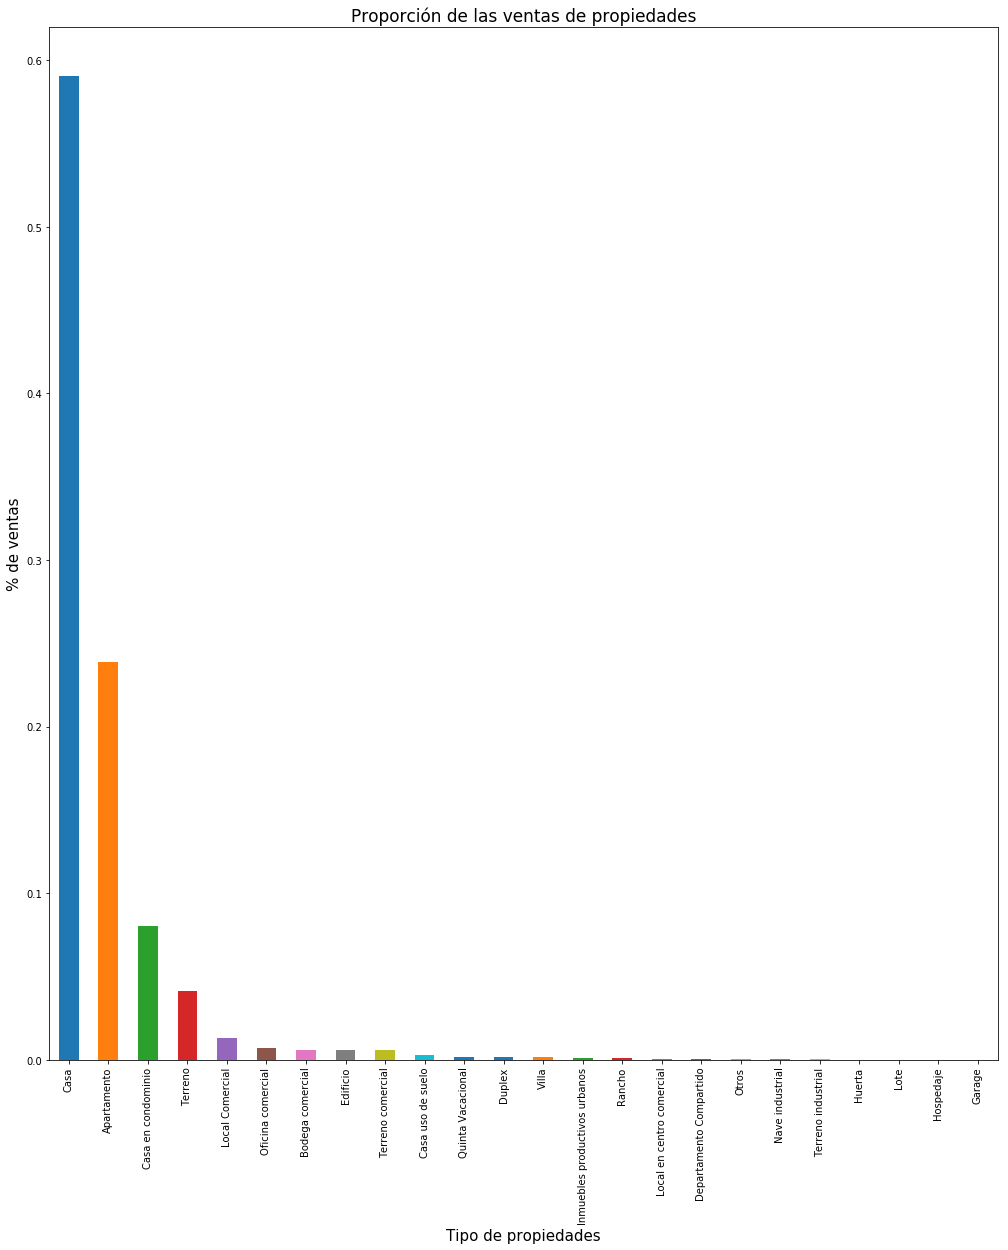

In [22]:
plot = dataFrame['tipodepropiedad'].value_counts(normalize = True).plot(kind='bar')
plot.set_title('Proporción de las ventas de propiedades', fontsize = 17)
plot.set_xlabel('Tipo de propiedades', fontsize = 15)
plot.set_ylabel('% de ventas', fontsize = 15)
plt.show()

#### Se puede ver como los primeros 5 tipos de propiedades (Casa, Apartamento, Casa en condominio, Terreno y Local Comercial) representan un 95% de las ventas en Zonaprop.

In [9]:
tipoDePropiedades = dataFrame['tipodepropiedad'].dropna().unique()
df = dataFrame.loc[:,['anio','tipodepropiedad']].groupby(['anio','tipodepropiedad']).agg('size').reset_index()
anios = dataFrame['anio'].unique()
anios.sort()

myDict = {} 
for anio in anios:
    myDict[anio] = [0] * 5

indices = {'Casa' : 0 ,'Apartamento' : 1 ,'Casa en condominio' : 2 , 'Terreno' : 3, 'Local Comercial': 4 }
propiedadesImportantes = list(indices.keys())
def backetizador(anios,propiedades,df,index,mapa):
    for ano in anios:
        for tipo in propiedades:
            try:
                mapa[ano][index[tipo]] = (df[(df['anio'] == ano) & (df['tipodepropiedad'] == tipo)][0]).item()
            except:
                mapa[ano][index[tipo]] = 0
            
backetizador(anios,propiedadesImportantes,df,indices,myDict)

### Debido a que entre las las casas, apartamentos, casas de condominio, terrenos y locales comerciales representan un 95% de las ventas que se realizaron durante el período entre 2012-2017, se decide por acotar los tipos de propiedades a tratar para ver el crecimiento que tuvieron en ese lapso de años.

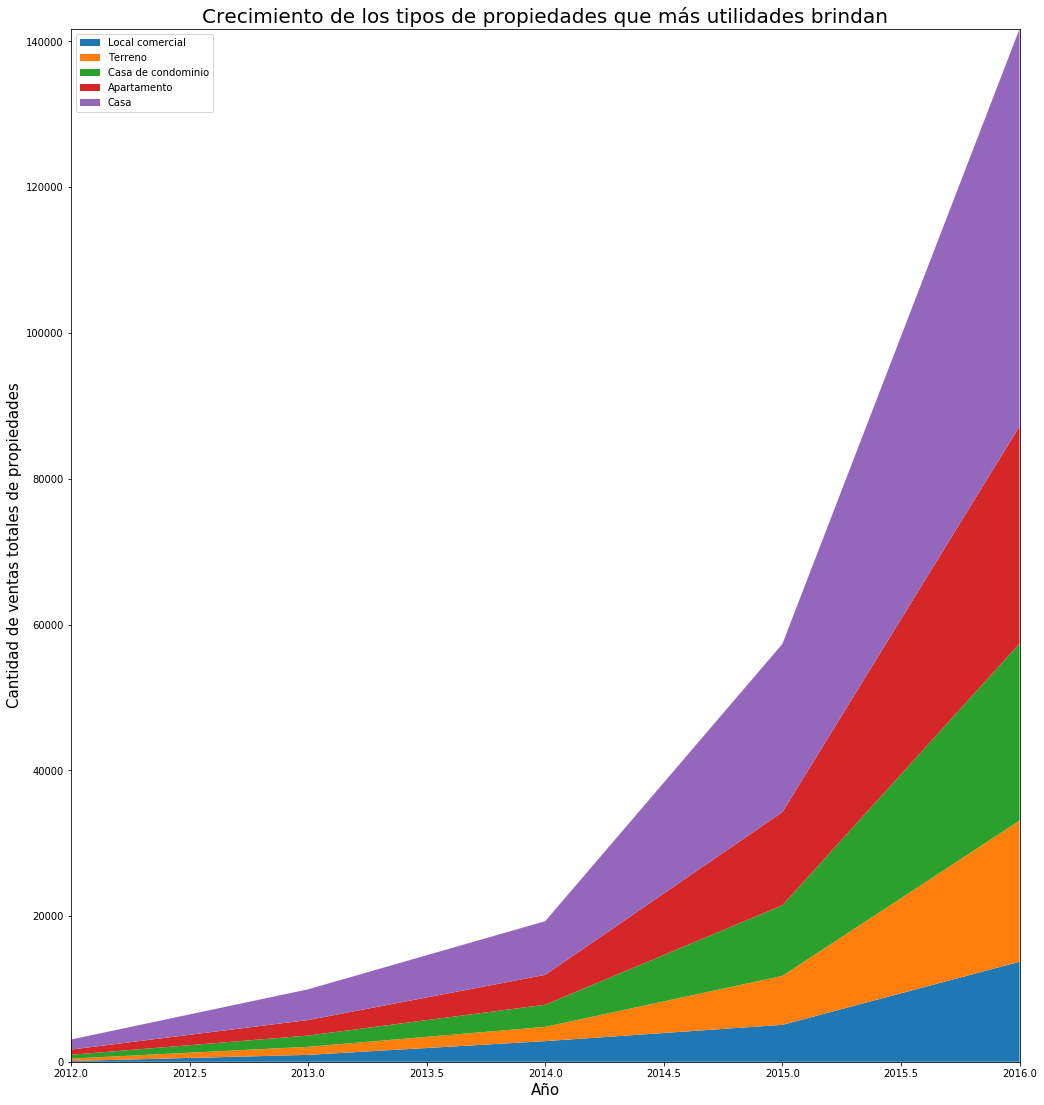

In [11]:
myDictDF = pd.DataFrame.from_dict(myDict)
data_perc = myDictDF

 
# Make the plot
plt.stackplot(range(2012,2017)
              , data_perc[2012].sort_values(ascending=True) 
              , data_perc[2013].sort_values(ascending=True)
              , data_perc[2014].sort_values(ascending=True)
              , data_perc[2015].sort_values(ascending=True)
              , data_perc[2016].sort_values(ascending=True)
              , labels=['Local comercial','Terreno','Casa de condominio','Apartamento','Casa']
              )
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Crecimiento de los tipos de propiedades que más utilidades brindan', fontsize = 20)

plt.ylabel('Cantidad de ventas totales de propiedades', fontsize = 15)
plt.xlabel('Año', fontsize = 15)
plt.rcParams["figure.figsize"] = [17,19]
plt.show()

#### Este gráfico muestra una tendencia muy clara de como en cantidad y en una proporción constante, han ido creciendo las ventas de todos los tipos de propiedades analizados desde el 2012 hasta el 2016. 